In [1]:
from a2c_eval import *

nvec = 10
max_episode_steps = 1000 #c)

env = gym.make('unbalanced-disk-v0', dt=0.025, umax=3)
env = gym.wrappers.time_limit.TimeLimit(env,max_episode_steps=max_episode_steps) #c)
env = Discretize(env, nvec)

actor_crit = ActorCritic(env, hidden_size=40)
actor_crit.load_state_dict(torch.load('model/A2C_best.pth')) # nvec = 10, hidden_size = 40

theta = []
omega = []
rewards = []
cum_rewards = []
cum_reward = 0
Qfun = lambda x: actor_crit.actor(torch.tensor(x[None,:],dtype=torch.float32))[0].numpy()
with torch.no_grad():
    obs = env.reset()
    try:
        for i in range(1500):
            action = np.argmax(Qfun(obs)) #b=)
            obs, reward, done, info = env.step(action)
            theta.append(obs[0])
            omega.append(obs[1])
            rewards.append(reward)
            cum_reward += reward
            cum_rewards.append(cum_reward)
            #print(obs, reward, done, info)
            #print(action)
    finally:
        env.close()

TypeError: __init__() got an unexpected keyword argument 'render_mode'

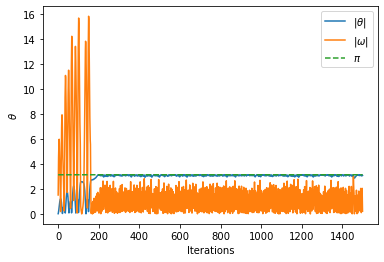

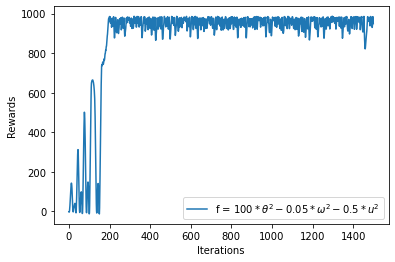

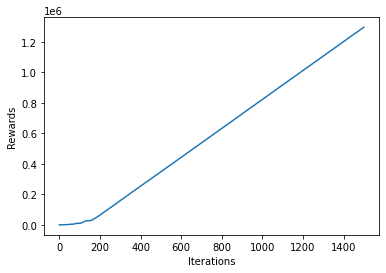

In [6]:
plt.plot(np.abs(theta),label='$|\\theta|$')
plt.plot(np.abs(omega),label='$|\omega|$')
plt.plot([np.pi]*len(theta),'--',label='$\pi$')
plt.xlabel('Iterations')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

plt.plot(rewards, label='f = $100*\\theta^2 - 0.05*\omega^2 - 0.5*u^2$')
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.legend()
plt.show()

plt.plot(cum_rewards)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.show()